In [1]:
from datetime import datetime
from sklearn.manifold import TSNE
import pickle
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import torch.nn.init as init
from torch.autograd import Variable
import argparse
import copy
import numpy as np
import time
import os
from PIL import Image
import matplotlib.pyplot as plt
#from utils.dataloader_all import *
#from utils.auc_test import *
#from utils import new_transforms

In [3]:
import pickle
l = pickle.load( open( "labels_all_3.p", "rb" ))
f = pickle.load( open( "finalWs_all_3.p", "rb" ))

In [4]:
def plot_with_labels(lowDWeights, labels, filename='tsne.png'):
    assert lowDWeights.shape[0] >= len(labels), "More labels than weights"
    plt.figure(figsize=(20, 20))  #in inches
    for i, label in enumerate(labels):
        x, y = lowDWeights[i,:]
        plt.scatter(x, y)
        plt.annotate(label,
                xy=(x, y),
                xytext=(5, 2),
                textcoords='offset points',
                ha='right',
                va='bottom')
    plt.show()
    #plt.savefig(filename)
    
#'TCGA-LUAD': 7, '
#'TCGA-KIRC': 5, 
#'Solid_Tissue_Normal_Lung': 2, 
#'TCGA-LUSC': 8, 
#'TCGA-KIRP': 6, 
#'TCGA-BRCA': 3, 
#'Solid_Tissue_Normal_Kidney': 1, 
#'Solid_Tissue_Normal_Breast': 0, 
#'TCGA-KICH': 4

In [5]:
type(f)
f_filter = []
l_filter = []
f[0]

array([ 0.00102622, -0.01587703, -0.01650335, ...,  0.02971646,
        0.02981082,  0.03941249])

In [6]:
np.isnan(f).sum()
for x in range(1,len(f)):
    array = f[x]
    array2 = l[x]
    if ~np.isnan(array[0]):
        f_filter.append(array)
        l_filter.append(array2)

In [7]:
len(f_filter[0])

5184

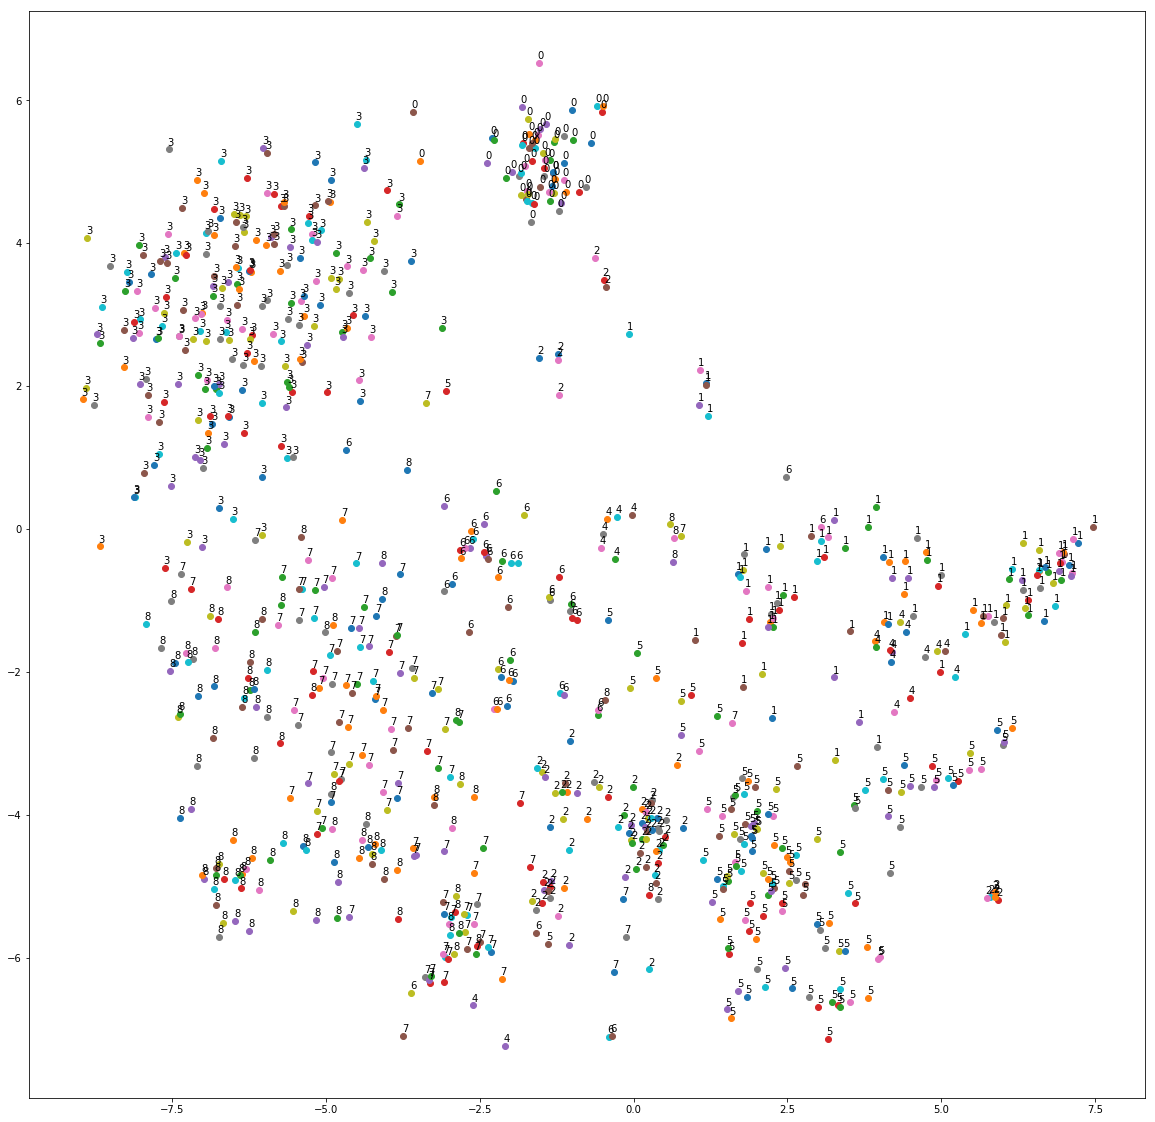

In [12]:
%matplotlib inline  

tsne = TSNE(perplexity=200, n_components=2, init='pca', n_iter=2000)
plot_only = 500
lowDWeights = tsne.fit_transform(f_filter)
labels = l_filter#['0','1','2','3','4','5','6','7','8','0','1','2','3','4','5','6','7','8','0','1','2','3','4','5','6','7','8','0','1','2','3','4','5','6','7','8']
plot_with_labels(lowDWeights, labels)

plt.show()

In [ ]:
lowDWeights

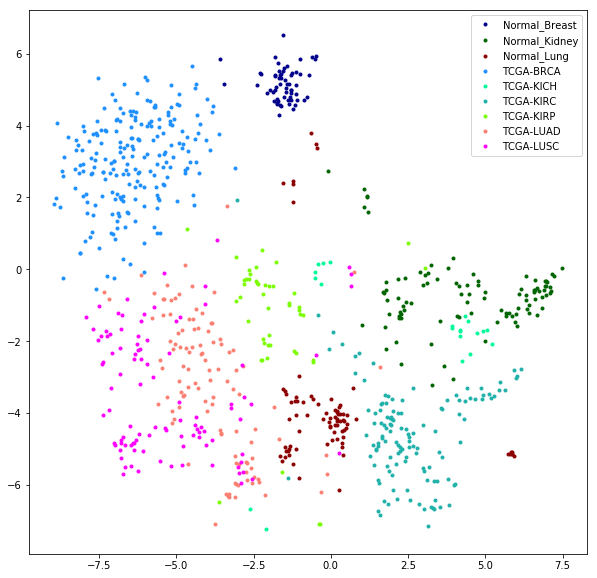

In [13]:
ip1_tsne_display = lowDWeights #[display_indices]
labels_display = l_filter #[display_indices]

classNames = ['Normal_Breast', 
              'Normal_Kidney',
              'Normal_Lung',
              'TCGA-BRCA',
              'TCGA-KICH',
              'TCGA-KIRC',
              'TCGA-KIRP', 
              'TCGA-LUAD', 
              'TCGA-LUSC']

print_classes = 9
#cmap = plt.get_cmap('nipy_spectral')
#colors = cmap(np.linspace(0, 1.0, print_classes))
#colors = (colors + np.ones(colors.shape))/2.0
colors =  'darkblue', 'darkgreen','darkred','dodgerblue', 'mediumspringgreen','lightseagreen','lawngreen', 'salmon','fuchsia'
test_colors = colors;

f = plt.figure(figsize=(10,10))

for label, color, className in zip(range(0,9), test_colors, classNames):
    plt.plot(ip1_tsne_display[np.array(labels_display) == label, 0], ip1_tsne_display[np.array(labels_display) == label, 1],
            'o', markersize=3, label=className, color=color)

plt.legend()
#plt.savefig('tsne.png')

plt.show()
#f.savefig("tsne_fc7.pdf", bbox_inches='tight')
